# Artificial Intelligence - Fall 2022 - Laboratory 04 : State-Space Search


## Introduction

State-space search or pathfinding requires a sequence of actions in the space of states \begin{equation*} s_{0} \mapsto s_{f} \end{equation*} which can be:
* explored, 
* discovered(frontier), 
* unexplored.

**A\*** is the most widespread option for this type of problems in AI: the algorithm finds the shortest path and uses a heuristic to guide itself.

## Today's Challenge

Given a bidimensional map with various obstacles, find the shortest path between two positions within it.

_Note:_ The **labyrinth** variable will play the role of the bidimensional map.

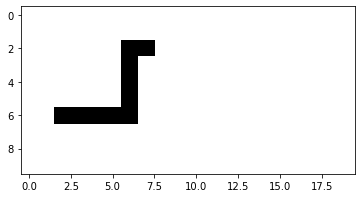

In [18]:
# Dimensions of the map.
height = 10
width = 20

# Bidimensional map as a list of lists.
# The empty cells are marked with 0, while blocks of walls with 1.
labyrinth = [[0 for c in range(width)] for r in range(height)]

for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

# Display labyrinth
%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys');

In [127]:
labyrinth

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

## Advanced functions

To simplify the iteration process, we can use: 

* `lambda`, the anonymous function which always returns an expression and has the following syntax:

```python
    lambda arguments: expression
```

In [19]:
# For this problem, we want to find the path 
# from the start point

start = (5, 5)

# to the end point.
final = (8, 8)

# Let us verify if having a list of tuples,
# their position corresponds to the endpoint.

# First, the lambda function:
is_final = lambda position: position == final

Lambda plays the role of an input argument in other functions, such as:

* `map`, which passes each element of the given iterable to a function:

```python
    map(function, iterable)
```

In [20]:
# Second, the map function:
    
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

* `filter` can easily select the values from a sequence with a certain property:

```python
    filter(function, sequence)
```

In [9]:
list(filter(is_final, [(1,1), (3, 6), (8, 8)]))

[(8, 8)]

## The A* algorithm

With the help of the following tasks, create the building blocks of the algorithm.

### Task 0

**a.** Given a certain position represented by a `tuple`, find if its location is valid.

While exploring the bidirectional map, be careful to:

* check if the available coordinates are inside the plane (0-height, 0-width),
* verify if the position is free and not occupied by an obstacle.

In [21]:
def verify_location(position):
    # extract coordinates
    (x, y) = position
    if x>=0 and y>=0 and x<height and y<width and labyrinth[x][y] == 0:
        return True
    else:
        return False



In [22]:
list(map(verify_location, [(-1,2), (height,3), (width,4), (5,5), (6,6), (0,9)])) 
# expected answer: [False, False, False, True, False, True]

[False, False, False, True, False, True]

**b.** Once you have verified the position, return its empty neighbours in a `list`.

Use both `filter` function and `verifiy_location` written above.

In [23]:
def get_neighbours(position):
    (x,y)=position
    neighburs=[]
    for i in range(-1,2):
        for j in range(-1,2):
            neighburs.append((x+i,y+j))
    neighburs.remove((x,y))
    result=list(filter(verify_location,neighburs))
    return result

get_neighbours((0,0))

[(0, 1), (1, 0), (1, 1)]

In [18]:
[get_neighbours(p) for p in [(0,9), (5,5)]]
# expected answer: [[(1, 10), (0, 10), (1, 9), (0, 8), (1, 8)], [(4, 4), (4, 5), (5, 4)]]

[[(0, 8), (0, 10), (1, 8), (1, 9), (1, 10)], [(4, 4), (4, 5), (5, 4)]]

### Heuristic search

After checking the surroundings, we want to expand our frontier towards the goal, rather than searching for all possible directions.

### Task 1

**a.** Compute the _Euclidean distance_:

For two dimensions: 

\begin{equation*}
d(x, y) = \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}}
\end{equation*}

In [13]:
from math import sqrt

In [10]:
def euclidean_distance(a, b):
    
    distance=sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    
    return distance

In [24]:
euclidean_distance((2,3), (4, 7))
# expected answer: 4.47213595499958

4.47213595499958

**b.** Compute the _Manhattan distance_:

For two dimensions: 

\begin{equation*}
d(x, y) = \left | x_{1} - x_{2} \right | +  \left | y_{1} - y_{2} \right |
\end{equation*}

In [11]:
def manhattan_distance(a, b):
    
    distance=abs(a[0]-b[0])+abs(a[1]-b[1])
    return distance

In [26]:
manhattan_distance((2,3), (4,0))
# expected answer: 5

5

To decide which location should be first checked from the _frontier_, we need to verify if the new possible route is better than the best previous one.

In practice, this could be accomplished using a **Priority Queue**. 

In [27]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, ((1, 2), 'cost_so_far: 2'))
heappush(priority_queue, ((0, 1), 'cost_so_far: 1'))
heappush(priority_queue, ((1, 4), 'cost_so_far: 3'))

print(heappop(priority_queue))
print(heappop(priority_queue))
print(heappop(priority_queue))

((0, 1), 'cost_so_far: 1')
((1, 2), 'cost_so_far: 2')
((1, 4), 'cost_so_far: 3')


The frontier uses a priority queue for expansion and has the following structure: 

`frontier[(discovered_nodes_as_tuple), (estimated_cost, node)]`

Save the discovered nodes in a dictionary:

`d[new_node] = (parent, cost_so_far)`

* The movement between cells costs one unit and represents the `real cost g` which helps in measuring the actual distance.
* The estimated distance to the goal is given by the `heuristic function` defined before.

### Task 2

**a.** Implement **A\*** algorithm which receives as arguments the start node, the final node and the heuristic function.

In [1]:
from heapq import heappop, heappush

In [155]:
def astar(start, end, h):
    # Frontier as list
    frontier = []
    heappush(frontier, (0 + h(start, end), 0, start)) #(g+h, g, parent)
    #Initial state
    actual_pos=start
    g=0
    passed=[]
    passed.append(start)
    while actual_pos!=end:
        #Find the available neighbours
        neighbours=get_neighbours(actual_pos)
        min_distance=100 # infinit becuase is out of the plane
        next_pos=actual_pos
        for pos in neighbours:
            #Calculate the distanace of eah neighbour
            distance_to_end=h(pos,end)
            # Select tthe next pos by tabking the position with minimun distance and if it is not repeted
            if (distance_to_end < min_distance) and (pos not in passed):
                min_distance=distance_to_end
                next_pos=pos
        # Upgrade the values
        
        actual_pos=next_pos
        g+=1
        passed.append(actual_pos)
        heappush(frontier,((g+min_distance),g,actual_pos))
    # Retrieve the path
    path=list(frontier)
    
    return path # the path, as list of positions


**b.** Run the algorithm using different heuristics.

In [171]:
start=(0,0)
end=(9,19)
p=astar(start,end,euclidean_distance)



23

### Task 3

* Which heuristic function can be used in our problem, when we can move diagonally on the map?
* Which is the best one to use?
* What if we could only move in the 4 cardinal directions?

In [178]:
def better_option():
    euclidean=astar(start,end,euclidean_distance)
    manhattan=astar(start,end,manhattan_distance)
    print('Number of steps: euclidean {} ; manhattan {}'.format(len(euclidean),len(manhattan)) )
    if(len(euclidean)>len(manhattan)):
        print('Manhattan is better')
    elif len(euclidean)==len(manhattan):
        print('Have the same number of steps')
    else:
        print('Euclidean is better')

In [179]:
# Modify the way to inspect the possible neighbours
def get_neighbours(position):
    (x,y)=position
    neighburs=[]
    neighburs.append((x-1,y))
    neighburs.append((x+1,y))
    neighburs.append((x,y-1))
    neighburs.append((x,y+1))
    result=list(filter(verify_location,neighburs))
    return result

better_option()


Number of steps: euclidean 29 ; manhattan 29
Have the same number of steps
